<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Intrusion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/DataSets/Intrusion\ detection

/content/drive/.shortcut-targets-by-id/15GQ5hVALyr2hDNdcw5nkjWjVLD-G8V3C/Intrusion detection


In [6]:
dir = r'/content/drive/MyDrive/DataSets/Intrusion detection'

In [7]:
import os
print(os.listdir(dir))

['Block Diagram.png', 'Train_data.csv', 'Test_data.csv', 'Test_data_output.csv', 'Code.ipynb']


In [8]:
data = pd.read_csv('Train_data.csv')
data_test = pd.read_csv('Test_data.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [13]:
data.rename(columns={'class': 'Class'}, inplace=True)

In [14]:
data['Class'].value_counts()

,count
Class,
normal,13449
anomaly,11743


In [15]:
data.shape

(25192, 42)

In [17]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Class'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder

ob_cols = data.select_dtypes(include='object').columns
ob_cols_test = data_test.select_dtypes(include='object').columns
le = LabelEncoder()

for col in ob_cols:
    data[col] = le.fit_transform(data[col])
for col in ob_cols_test:
    data_test[col] = le.fit_transform(data_test[col])

In [19]:
  data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

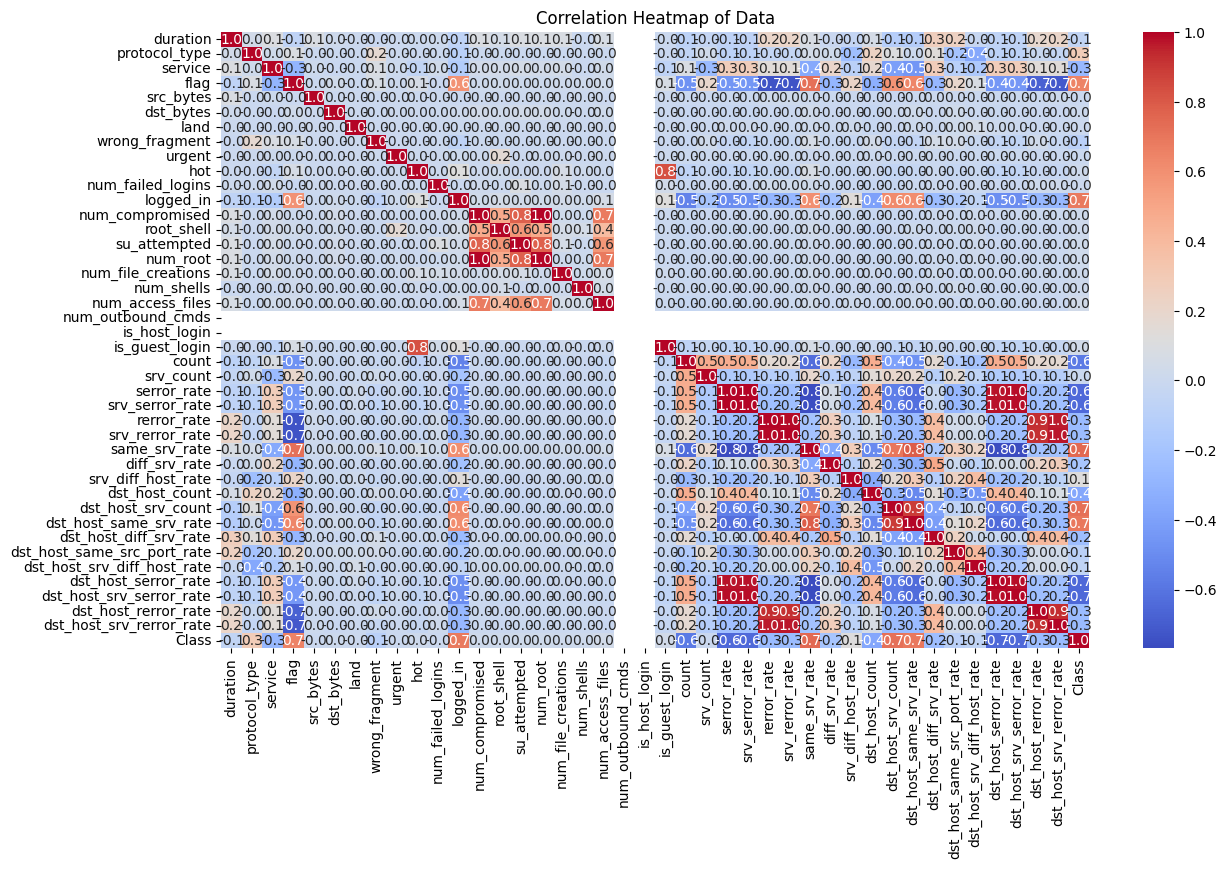

In [24]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True , fmt='.1f')
plt.title('Correlation Heatmap of Data')
plt.show()

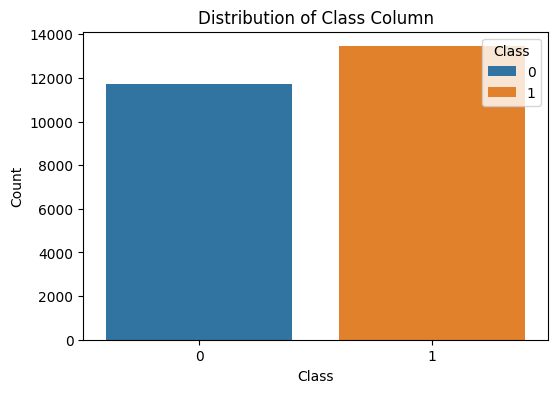

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data , hue='Class')
plt.title('Distribution of Class Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [27]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [28]:
xtest = data_test

In [29]:
x.shape

(25192, 41)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xscl = sc.fit_transform(x)
xscltest = sc.transform(xtest)

In [32]:
print(xscl[:1])

[[-0.11355066 -0.12606067 -0.64538418  0.75302096 -0.00988885 -0.03930979
  -0.00891048 -0.09122318 -0.00630053 -0.09193335 -0.02622029 -0.80762582
  -0.02187261 -0.03937653 -0.02766547 -0.02172416 -0.02780802 -0.0189046
  -0.04391678  0.          0.         -0.09598961 -0.7202436  -0.35462794
  -0.64014201 -0.63397817 -0.3721856  -0.37309835  0.77210866 -0.34928194
  -0.37388608 -0.32863359 -0.81398452 -0.7791569  -0.2806733   0.07311974
  -0.28799346 -0.64180407 -0.62736475 -0.22166806 -0.37428075]]


In [34]:
from sklearn.feature_selection import SelectKBest , f_regression

selector = SelectKBest(score_func=f_regression, k=25)
x_select = selector.fit_transform(xscl, y)
xtest_select = selector.transform(xscltest)

In [35]:
from sklearn.model_selection import train_test_split
x_train , x_val , y_train , y_val = train_test_split(x_select , y , test_size=0.2 , random_state=42)

In [36]:
print(x_train.shape)
print(x_val.shape)

(20153, 25)
(5039, 25)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
ypred = rf.predict(x_val)

print(classification_report(y_val, ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2365
           1       0.99      1.00      1.00      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



In [39]:
from sklearn.linear_model import LogisticRegression


lg = LogisticRegression(random_state=42)
lg.fit(x_train, y_train)
ypred = lg.predict(x_val)

print(classification_report(y_val, ypred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2365
           1       0.95      0.97      0.96      2674

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039



In [41]:
ypred_xtest = rf.predict(xtest_select)
print(ypred_xtest[:10])

[0 0 1 0 1 1 1 1 1 1]


In [43]:
data_test['output'] = ypred_xtest
data_test.to_csv('/content/Test_Data_output.csv' , index=False)